In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
houses = pd.read_csv('Datasets/housing.csv')

In [4]:
houses.shape

(7468, 6)

In [5]:
houses.head(30)

,address,bed_bath,more_info,price,status,zip_code
0,"360 E Randolph St # 601-602, Chicago, IL","3 bds · 4 ba · 2,700 sqft",http://www.zillow.com/homedetails/360-E-Randol...,"$1,299,000",Condo For Sale,60601
1,"8 E Randolph St UNIT 1006, Chicago, IL",1 bd · 1 ba · 850 sqft,http://www.zillow.com/homedetails/8-E-Randolph...,"$324,900",Condo For Sale,60601
2,NaN,NaN,NaN,NaN,NaN,60601
3,"340 E Randolph St APT 704, Chicago, IL","2 bds · 3 ba · 1,902 sqft",http://www.zillow.com/homedetails/340-E-Randol...,"$1,099,000",Condo For Sale,60601
4,"420 E Waterside Dr UNIT 310, Chicago, IL","2 bds · 3 ba · 1,500 sqft",http://www.zillow.com/homedetails/420-E-Waters...,"$567,770",Condo For Sale,60601
5,"155 N Harbor Dr # 1212-13, Chicago, IL","3 bds · 3 ba · 2,367 sqft",http://www.zillow.com/homedetails/155-N-Harbor...,"$1,350,000",Condo For Sale,60601
6,"195 N Harbor Dr APT 3304, Chicago, IL","2 bds · 2 ba · 1,250 sqft",http://www.zillow.com/homedetails/195-N-Harbor...,"$575,000",Condo For Sale,60601
7,"222 N Columbus Dr APT 1402, Chicago, IL","2 bds · 2 ba · 1,200 sqft",http://www.zillow.com/homedetails/222-N-Columb...,"$399,000",Condo For Sale,60601
8,"225 N Columbus Dr UNIT 5908, Chicago, IL","2 bds · 3 ba · 1,547 sqft",http://www.zillow.com/homedetails/225-N-Columb...,"$1,025,000",Condo For Sale,60601
9,"225 N Columbus Dr UNIT 7504, Chicago, IL","1 bd · 2 ba · 1,209 sqft",http://www.zillow.com/homedetails/225-N-Columb...,"$848,800",Condo For Sale,60601


# EDA

In [6]:
houses.shape

(7468, 6)

In [7]:
houses.dtypes

address      object
bed_bath     object
more_info    object
price        object
status       object
zip_code      int64
dtype: object

In [8]:
houses.isnull().sum()

address       280
bed_bath      280
more_info     280
price        2542
status        280
zip_code        0
dtype: int64

### bed_bath

break down into number of bedrooms, number of bathrooms, and square footage

### price

strip non-numeric characters, return as int or float

### Address

there may or may not be anything useable in here. could infer neighborhood, but that might be too much work

### more_info

could scrape data from here

### status

- is_condo
- is_house
- is_apartment
- auction
- forclosure
- for sale by owner


In [9]:
## lots of good information in here

houses['status'].value_counts()

Condo For Sale               1943
House For Sale               1336
Pre-Foreclosure              1182
Foreclosed                    530
Apartment For Sale            476
Pre-Foreclosure (Auction)     395
Auction                       328
Lot/Land For Sale             250
Foreclosure                   232
For Sale by Owner             166
New Construction              143
Townhouse For Sale            109
Make Me Move®                  69
Co-op For Sale                 20
Coming Soon                     9
Name: status, dtype: int64

# Cleaning/feature building

### price

In [10]:
def bleach(string):
    temp = ""
    string = str(string)
    for i in string:
        if i in ["1","2","3","4","5","6","7","8","9","0", "."]:
            temp += i
    if len(temp) > 0:
        return float(temp)

In [11]:
bleach('asd;lkj34609auf[q234j.003sasdfh]')

34609234.003

In [12]:
houses['cleaned_price'] = houses['price'].apply(bleach)

In [13]:
houses['cleaned_price'].describe()

count    4.926000e+03
mean     4.598513e+05
std      7.973731e+05
min      1.070000e+00
25%      1.249000e+05
50%      2.735000e+05
75%      5.000000e+05
max      1.300000e+07
Name: cleaned_price, dtype: float64

(array([  2.83200000e+03,   1.27000000e+03,   3.84000000e+02,
          1.56000000e+02,   7.00000000e+01,   5.60000000e+01,
          3.70000000e+01,   3.80000000e+01,   1.80000000e+01,
          1.30000000e+01,   6.00000000e+00,   5.00000000e+00,
          7.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.10000000e+01,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([  1.07000000e+00,   3.25001043e+05,   6.50001016e+05,
          9.75000990e+05,   1.30000096e+06,   1.62500094e+06,
          1.95000091e+06,   2.27500088e+06

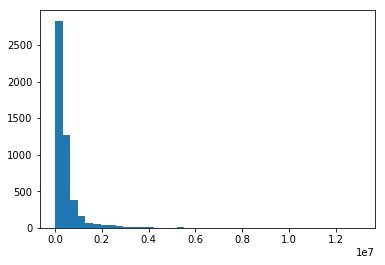

In [14]:
## maybe this should be log-transformed and/or clipped
plt.hist(houses['cleaned_price'].dropna(), bins=40)

(array([  1.00000000e+00,   8.00000000e+00,   1.07000000e+02,
          9.10000000e+01,   9.00000000e+00,   1.48000000e+02,
          6.67000000e+02,   2.60600000e+03,   1.20000000e+03,
          8.90000000e+01]),
 array([  0.06765865,   1.69893878,   3.3302189 ,   4.96149903,
          6.59277916,   8.22405928,   9.85533941,  11.48661954,
         13.11789966,  14.74917979,  16.38045992]),
 <a list of 10 Patch objects>)

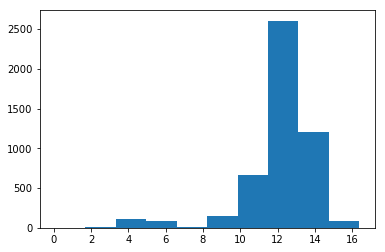

In [15]:
## with log-transform

plt.hist(np.log(houses['cleaned_price'].dropna()))

(array([ 1303.,  2446.,   814.,   229.,    82.,    20.,    16.,     5.,
            6.,     5.]),
 array([  1.03440804e+00,   3.61486095e+02,   7.21937782e+02,
          1.08238947e+03,   1.44284116e+03,   1.80329284e+03,
          2.16374453e+03,   2.52419622e+03,   2.88464790e+03,
          3.24509959e+03,   3.60555128e+03]),
 <a list of 10 Patch objects>)

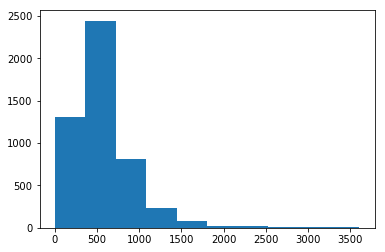

In [16]:
## with sqrt-transform

plt.hist(np.sqrt(houses['cleaned_price'].dropna()))

### bed_bath

In [17]:
## checks the length of the split object

houses['bb_check'] = houses['bed_bath'].apply(lambda x: len(str(x).split("·")))

In [18]:
houses['bb_check'].value_counts()

3    6012
4    1039
1     417
Name: bb_check, dtype: int64

In [19]:
## it looks like bb_check==1 are all NaN

houses[houses['bb_check']==1].head()

,address,bed_bath,more_info,price,status,zip_code,cleaned_price,bb_check
2,NaN,NaN,NaN,NaN,NaN,60601,NaN,1
30,NaN,NaN,NaN,NaN,NaN,60601,NaN,1
58,NaN,NaN,NaN,NaN,NaN,60601,NaN,1
85,NaN,NaN,NaN,NaN,NaN,60601,NaN,1
112,NaN,NaN,NaN,NaN,NaN,60601,NaN,1


In [20]:
## it looks like bb_check==4 are all forclosures with only an estimated price
## I could bring in the estimated price into price

houses[houses['bb_check']==4].head()

,address,bed_bath,more_info,price,status,zip_code,cleaned_price,bb_check
80,Sign in for details,Foreclosure Est. $265K · -- bds · -- ba · -- sqft,http://www.zillow.com/homedetail/AuthRequired....,NaN,Pre-Foreclosure,60601,NaN,4
81,Sign in for details,Foreclosure Est. $281K · -- bds · -- ba · -- sqft,http://www.zillow.com/homedetail/AuthRequired....,NaN,Pre-Foreclosure,60601,NaN,4
82,Sign in for details,Foreclosure Est. $377K · -- bds · -- ba · -- sqft,http://www.zillow.com/homedetail/AuthRequired....,NaN,Pre-Foreclosure (Auction),60601,NaN,4
126,Sign in for details,"Foreclosure Est. $747K · 3 bds · 2.5 ba · 1,80...",http://www.zillow.com/homedetail/AuthRequired....,NaN,Pre-Foreclosure,60601,NaN,4
222,Sign in for details,Foreclosure Est. $224K · -- bds · -- ba · -- sqft,http://www.zillow.com/homedetail/AuthRequired....,NaN,Pre-Foreclosure,60603,NaN,4


In [21]:
## dropping the missing values for bed_bath

houses1 = houses[houses['bb_check'] != 1].copy()

In [22]:
## returns the split containing square feet

houses1['sqft'] = houses['bed_bath'].apply(lambda x: str(x).split("·")[-1])

In [23]:
## bleaches square feet fragment and returns as float

houses1['sqft'] = houses1['sqft'].apply(bleach)

In [24]:
## splits and returns bed_bath split containing number of baths

houses1['baths'] = houses1['bed_bath'].apply(lambda x: str(x).split("·")[-2])

In [25]:
## bleaches baths

houses1['baths'] = houses1['baths'].apply(bleach)

In [26]:
houses1['bed_bath'].value_counts()

-- bds · -- ba · -- sqft                                 364
2 bds · 2 ba · -- sqft                                   108
1 bd · 1 ba · -- sqft                                     94
4 bds · 2 ba · -- sqft                                    81
2 bds · 1 ba · -- sqft                                    78
3 bds · 2 ba · -- sqft                                    56
2 bds · 2 ba · 1,200 sqft                                 55
6 bds · 2 ba · -- sqft                                    49
Studio · -- ba · -- sqft                                  48
5 bds · 2 ba · -- sqft                                    45
2 bds · 1 ba · 1,000 sqft                                 39
1 bd · 1 ba · 800 sqft                                    36
2 bds · 2 ba · 1,400 sqft                                 34
5 bds · 3 ba · -- sqft                                    33
3 bds · 3 ba · -- sqft                                    33
1 bd · 1 ba · 850 sqft                                    30
2 bds · 1 ba · 900 sqft 

In [27]:
## replaces studio with 0.5
houses1['bed_bath'] = houses1['bed_bath'].apply(lambda x: x.replace('Studio', '0.5'))

In [28]:
## splits and returns bed_bath split containing number of bedrooms

houses1['bedrooms'] = houses1['bed_bath'].apply(lambda x: str(x).split("·")[-3])

In [29]:
## bleaches bedrooms

houses1['bedrooms'] = houses1['bedrooms'].apply(bleach)

In [30]:
def extract_forclosure(x):
    if len(str(x).split("·")) == 4:
        return str(x).split("·")[0]
    else:
        return "nothing"

In [31]:
## returns forclosure information

houses1['forclosure_info'] = houses1['bed_bath'].apply(extract_forclosure)

In [32]:
houses1['forclosure_info'].describe()

count        7051
unique        315
top       nothing
freq         6012
Name: forclosure_info, dtype: object

In [33]:
houses1['forclosure_info'].value_counts()

nothing                     6012
Foreclosure Est. $141K        13
Foreclosure Est. $165K        12
Foreclosure Est. $131K        10
Foreclosure Est. $153K        10
Foreclosure Est. $152K        10
Foreclosure Est. $144K        10
Foreclosure Est. $166K        10
Foreclosure Est. $124K         9
Foreclosure Est. $113K         9
Foreclosure Est. $126K         9
Foreclosure Est. $196K         9
Foreclosure Est. $136K         9
Foreclosure Est. $140K         8
Foreclosure Est. $118K         8
Foreclosure Est. $93K          8
Foreclosure Est. $151K         8
Foreclosure Est. $174K         8
Foreclosure Est. $82K          8
Foreclosure Est. $139K         8
Foreclosure Est. $138K         8
Foreclosure Est. $233K         7
Foreclosure Est. $108K         7
Foreclosure Est. $272K         7
Foreclosure Est. $119K         7
Foreclosure Est. $122K         7
Foreclosure Est. $133K         7
Foreclosure Est. $84K          7
Foreclosure Est. $70K          7
Foreclosure Est. $125K         7
          

In [34]:
def clean_forclosure(x):
    y = x.split("$")[-1]
    if "K" in y:
        return bleach(y) * 1000
    elif "M" in y:
        return bleach(y) * 1000000
    else:
        return 0

In [35]:
## creates foreclosure value column

# houses1['foreclosure_value'] = houses1['forclosure_info'].apply(lambda x: x.strip(" "))
houses1['foreclosure_value'] = houses1['forclosure_info'].apply(clean_forclosure)

In [36]:
## filling missing values with 0

houses1['cleaned_price'].fillna(0, inplace=True)

In [37]:
## combining original given prices with estimated forclosure values

houses1['all_prices'] = houses1['cleaned_price'] + houses1['foreclosure_value']

## there are still some zeroes in here

In [38]:
houses1['all_prices'].describe()

count    7.051000e+03
mean     3.449579e+05
std      6.918509e+05
min      0.000000e+00
25%      4.225000e+04
50%      1.849000e+05
75%      3.899000e+05
max      1.300000e+07
Name: all_prices, dtype: float64

In [39]:
houses1.shape

(7051, 14)

In [40]:
houses1[houses1['all_prices'] != 0].shape

(5831, 14)

In [41]:
houses1[houses1['all_prices'] == 0].shape

(1220, 14)

In [42]:
## removes houses with no listed value

houses1 = houses1[houses1['all_prices'] != 0].copy()

(array([  3.67600000e+03,   1.32400000e+03,   3.90000000e+02,
          1.58000000e+02,   6.90000000e+01,   5.60000000e+01,
          3.60000000e+01,   3.90000000e+01,   1.80000000e+01,
          1.20000000e+01,   6.00000000e+00,   6.00000000e+00,
          7.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.10000000e+01,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([  1.07000000e+00,   3.25001043e+05,   6.50001016e+05,
          9.75000990e+05,   1.30000096e+06,   1.62500094e+06,
          1.95000091e+06,   2.27500088e+06

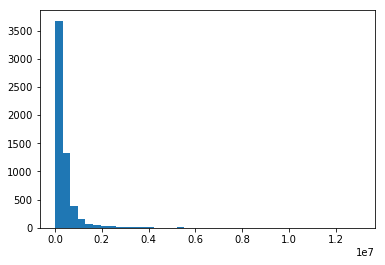

In [43]:
plt.hist(houses1['all_prices'], bins=40)

(array([  1.00000000e+00,   8.00000000e+00,   1.07000000e+02,
          9.10000000e+01,   5.00000000e+00,   1.13000000e+02,
          8.16000000e+02,   3.38500000e+03,   1.21600000e+03,
          8.90000000e+01]),
 array([  0.06765865,   1.69893878,   3.3302189 ,   4.96149903,
          6.59277916,   8.22405928,   9.85533941,  11.48661954,
         13.11789966,  14.74917979,  16.38045992]),
 <a list of 10 Patch objects>)

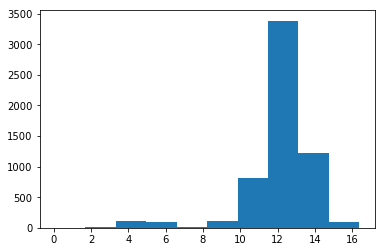

In [44]:
## this one isn't really that bad

plt.hist(np.log(houses1['all_prices']))

(array([ 1592.,  3050.,   828.,   227.,    81.,    21.,    16.,     5.,
            6.,     5.]),
 array([  1.03440804e+00,   3.61486095e+02,   7.21937782e+02,
          1.08238947e+03,   1.44284116e+03,   1.80329284e+03,
          2.16374453e+03,   2.52419622e+03,   2.88464790e+03,
          3.24509959e+03,   3.60555128e+03]),
 <a list of 10 Patch objects>)

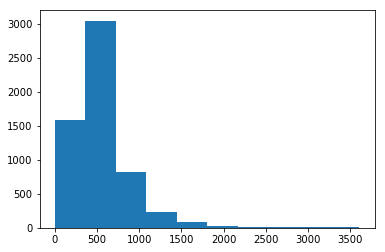

In [45]:
## not great, but not as good as the sqrt transform

plt.hist(np.sqrt(houses1['all_prices']))

### zip_code

shouldn't leave as int, but 56 unique values

maybe str them and dummy out

In [46]:
houses1['zip_code'].nunique()

56

In [47]:
## none of them really warrent dropping

houses1['zip_code'].value_counts()

60614    134
60611    132
60610    130
60657    128
60601    126
60659    126
60613    125
60647    124
60605    124
60603    123
60622    117
60640    117
60607    117
60646    116
60618    116
60660    115
60626    114
60617    113
60609    112
60625    112
60656    112
60643    111
60619    109
60628    109
60621    107
60634    103
60645    103
60620    103
60631    102
60661    102
60624    101
60616    101
60636    101
60629    100
60606    100
60608     99
60630     99
60652     97
60623     97
60615     96
60612     95
60641     94
60655     93
60653     91
60637     91
60651     90
60649     88
60644     86
60827     85
60635     85
60639     85
60633     85
60632     81
60638     79
60602     70
60604     60
Name: zip_code, dtype: int64

In [48]:
## converts zip codes to str

houses1['zip_code'] = houses1['zip_code'].apply(str)

In [49]:
## creates zip code dummy variables

for i in list(set(list(houses1['zip_code']))):
    houses1['zip_'+i] = houses1['zip_code'].apply(lambda x: 1 if i in x else 0)

### status

In [50]:
houses1['status'].value_counts()

Condo For Sale               1943
House For Sale               1335
Foreclosed                    507
Apartment For Sale            476
Pre-Foreclosure               303
Pre-Foreclosure (Auction)     228
Auction                       207
Foreclosure                   193
For Sale by Owner             164
New Construction              143
Lot/Land For Sale             125
Townhouse For Sale            109
Make Me Move®                  69
Co-op For Sale                 20
Coming Soon                     9
Name: status, dtype: int64

In [51]:
list(set(list(houses1['status'])))

['Pre-Foreclosure (Auction)',
 'Make Me Move\xc2\xae',
 'Apartment For Sale',
 'Foreclosure',
 'Coming Soon',
 'Auction',
 'For Sale by Owner',
 'Lot/Land For Sale',
 'Townhouse For Sale',
 'House For Sale',
 'Foreclosed',
 'Condo For Sale',
 'Co-op For Sale',
 'New Construction',
 'Pre-Foreclosure']

In [52]:
## list of housing statuses, with a couple removed
housing_statuses = ['Pre-Foreclosure (Auction)', 'Make Me Move',
                    'Apartment For Sale', 'Foreclosure', 'Auction', 'For Sale by Owner',
                    'Lot/Land For Sale', 'Townhouse For Sale', 'House For Sale', 'Foreclosed',
                    'Condo For Sale', 'Co-op For Sale','New Construction','Pre-Foreclosure']

for i in housing_statuses:
    i_cleaned = i.replace(" ", "_")
    houses1['status_' + i_cleaned] = houses1['status'].apply(lambda x: 1 if i == x else 0)

### Target

In [53]:
houses1['all_prices'].describe()

count    5.831000e+03
mean     4.171323e+05
std      7.407505e+05
min      1.070000e+00
25%      1.220000e+05
50%      2.390000e+05
75%      4.499000e+05
max      1.300000e+07
Name: all_prices, dtype: float64

(array([  1.00000000e+00,   8.00000000e+00,   1.07000000e+02,
          9.10000000e+01,   5.00000000e+00,   1.13000000e+02,
          8.16000000e+02,   3.38500000e+03,   1.21600000e+03,
          8.90000000e+01]),
 array([  0.06765865,   1.69893878,   3.3302189 ,   4.96149903,
          6.59277916,   8.22405928,   9.85533941,  11.48661954,
         13.11789966,  14.74917979,  16.38045992]),
 <a list of 10 Patch objects>)

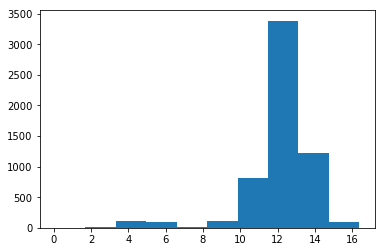

In [54]:
plt.hist(np.log(houses1['all_prices']))

In [55]:
houses1['log_price'] = np.log(houses1['all_prices'])

In [56]:
houses1['log_price'].describe()

count    5831.000000
mean       12.123454
std         1.766605
min         0.067659
25%        11.711776
50%        12.384219
75%        13.016781
max        16.380460
Name: log_price, dtype: float64

In [57]:
houses1['high_price'] = houses1['all_prices'].apply(lambda x: 1 if x > np.mean(houses1['all_prices']) else 0)

In [58]:
houses1['high_price'].value_counts()

0    4212
1    1619
Name: high_price, dtype: int64

In [59]:
houses1['high_price2'] = houses1['all_prices'].apply(lambda x: 1 if x > np.median(houses1['all_prices']) else 0)

In [60]:
houses1['high_price2'].value_counts()

0    2916
1    2915
Name: high_price2, dtype: int64

In [61]:
houses1['all_prices'].describe()

count    5.831000e+03
mean     4.171323e+05
std      7.407505e+05
min      1.070000e+00
25%      1.220000e+05
50%      2.390000e+05
75%      4.499000e+05
max      1.300000e+07
Name: all_prices, dtype: float64

In [62]:
houses1['all_prices'].median()

239000.0

In [63]:
houses1.columns

Index([u'address', u'bed_bath', u'more_info', u'price', u'status', u'zip_code',
       u'cleaned_price', u'bb_check', u'sqft', u'baths', u'bedrooms',
       u'forclosure_info', u'foreclosure_value', u'all_prices', u'zip_60637',
       u'zip_60645', u'zip_60644', u'zip_60632', u'zip_60661', u'zip_60660',
       u'zip_60655', u'zip_60633', u'zip_60639', u'zip_60605', u'zip_60604',
       u'zip_60607', u'zip_60606', u'zip_60601', u'zip_60626', u'zip_60603',
       u'zip_60602', u'zip_60641', u'zip_60640', u'zip_60629', u'zip_60628',
       u'zip_60609', u'zip_60608', u'zip_60647', u'zip_60646', u'zip_60659',
       u'zip_60651', u'zip_60623', u'zip_60622', u'zip_60656', u'zip_60621',
       u'zip_60649', u'zip_60620', u'zip_60638', u'zip_60625', u'zip_60616',
       u'zip_60617', u'zip_60614', u'zip_60615', u'zip_60612', u'zip_60613',
       u'zip_60610', u'zip_60611', u'zip_60634', u'zip_60635', u'zip_60636',
       u'zip_60624', u'zip_60630', u'zip_60631', u'zip_60618', u'zip_60619',
  

In [64]:
houses1['sqft'].fillna(np.mean(houses1['sqft']), inplace=True)
houses1['baths'].fillna(np.mean(houses1['baths']), inplace=True)
houses1['bedrooms'].fillna(np.mean(houses1['bedrooms']), inplace=True)

# setting x and y

In [65]:
y = houses1['high_price2']
x = houses1[['sqft', u'baths', u'bedrooms', 
            'zip_60637',
            u'zip_60645', u'zip_60644', u'zip_60632', u'zip_60661', u'zip_60660',
            u'zip_60655', u'zip_60633', u'zip_60639', u'zip_60605',
            u'zip_60607', u'zip_60606', u'zip_60601', u'zip_60626', u'zip_60603',
            u'zip_60602', u'zip_60641', u'zip_60640', u'zip_60629', u'zip_60628',
            u'zip_60609', u'zip_60608', u'zip_60647', u'zip_60646', u'zip_60659',
            u'zip_60651', u'zip_60623', u'zip_60622', u'zip_60656', u'zip_60621',
            u'zip_60649', u'zip_60620', u'zip_60638', u'zip_60625', u'zip_60616',
            u'zip_60617', u'zip_60614', u'zip_60615', u'zip_60612', u'zip_60613',
            u'zip_60610', u'zip_60611', u'zip_60634', u'zip_60635', u'zip_60636',
            u'zip_60624', u'zip_60630', u'zip_60631', u'zip_60618', u'zip_60619',
            u'zip_60652', u'zip_60657', u'zip_60653', u'zip_60827', u'zip_60643',
            u'status_Pre-Foreclosure_(Auction)', u'status_Make_Me_Move',
            u'status_Apartment_For_Sale', u'status_Foreclosure', u'status_Auction',
            u'status_For_Sale_by_Owner', u'status_Lot/Land_For_Sale',
            u'status_Townhouse_For_Sale', u'status_House_For_Sale',
            u'status_Foreclosed', u'status_Condo_For_Sale',
            u'status_Co-op_For_Sale', u'status_New_Construction',
            u'status_Pre-Foreclosure']].copy()

In [66]:
x = StandardScaler().fit_transform(x)

In [67]:
x.shape

(5831, 72)

In [68]:
y.shape

(5831,)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [70]:
x_train.shape

(4373, 72)

In [71]:
x_test.shape

(1458, 72)

# Modeling

In [72]:
lm = LogisticRegression()

In [73]:
def run_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    print "Base model score: " + str(np.mean(y_test))[:6]
    print "Training set score: ", str(model.score(x_train, y_train))[:6]
    print "Test set score: ", str(model.score(x_test, y_test))[:6]
    predictions = model.predict(x_test)
    print "\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1'])
    print "\nClassification Report:\n",classification_report(y_test, predictions)

In [74]:
run_model(x_train, y_train, x_test, y_test, lm)

Base model score: 0.4958
Training set score:  0.8728
Test set score:  0.8936

Confusion Matrix:
      predicted_0  predicted_1
is_0          657           78
is_1           77          646

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.89      0.89       735
          1       0.89      0.89      0.89       723

avg / total       0.89      0.89      0.89      1458



In [80]:
ab = AdaBoostClassifier()
gbm = GradientBoostingClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()

In [76]:
ab

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [81]:
models = [knn, rf, et, gbm, ab, dt]
for model in models:
    print "\nModel: ", str(model).split("(")[0]
    print model
    run_model(x_train, y_train, x_test, y_test, model)
    print "\n"


Model:  KNeighborsClassifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Base model score: 0.4958
Training set score:  0.9046
Test set score:  0.9005

Confusion Matrix:
      predicted_0  predicted_1
is_0          661           74
is_1           71          652

Classification Report:
             precision    recall  f1-score   support

          0       0.90      0.90      0.90       735
          1       0.90      0.90      0.90       723

avg / total       0.90      0.90      0.90      1458




Model:  RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
  

In [78]:
ab?